# Effects of Time Estimation in Crime Reports

#### Load data from CSV and convert relevant "time" columns into datetime format

In [52]:
import pandas as pd
from datetime import datetime

sanfran = pd.read_csv('sanfrancisco_incidents_summer_2014.csv')
seattle = pd.read_csv('seattle_incidents_summer_2014.csv')

sanfran['Time'] = pd.to_datetime(sanfran.Time.astype(str), format='%H:%M')
seattle['Occurred Date or Date Range Start'] = pd.to_datetime(seattle['Occurred Date or Date Range Start'])

#### Count crimes by hour, and shift histogram by 4 hours to center the chart

In [53]:
n_shift = 4
sanfran_count = sanfran.groupby(sanfran.Time.dt.hour).count()
sanfran_count = sanfran_count.reindex(list(range(n_shift,len(sanfran_count)))+list(range(0,n_shift)))
seattle_count = seattle.groupby(seattle['Occurred Date or Date Range Start'].dt.hour).count()
seattle_count = seattle_count.reindex(list(range(n_shift,len(seattle_count)))+list(range(0,n_shift)))

#### Create histogram of crimes per hour in a day

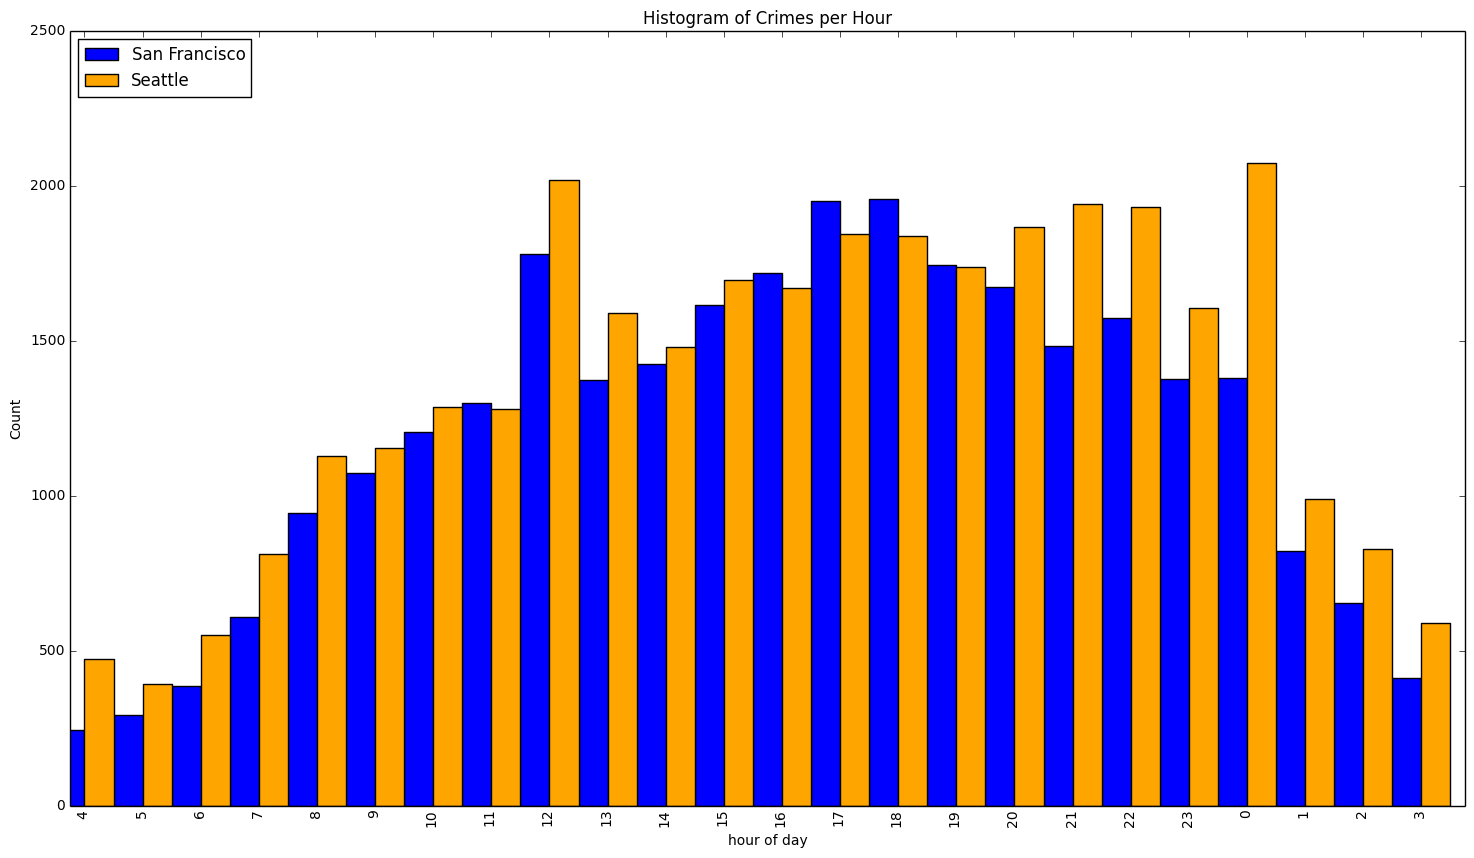

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(18, 10)) # Create matplotlib figure
ax = fig.add_subplot(111)
sanfran_count['Time'].plot(kind="bar", legend=None, label='San Francisco', color='blue', position=1, width=.5)
seattle_count['Month'].plot(kind="bar", legend=None, label='Seattle', color='orange', position=0, width=.5)
ax.set_xlabel("hour of day")
ax.set_ylabel("Count")
plt.legend(loc='upper left')
plt.title('Histogram of Crimes per Hour')
plt.show()

###  It can be seen from the chart above that crime slowly increases during the day, before it declines at night.  In San Francisco crime appears to peak around 4-5 PM while in Seattle it peaks at 10-11 PM.  At first glance it appears that Seattle has a sharp increase in crime at midnight.  However, a more likely explanation is this is just an artifact of how times are estimated when an exact time is unknown.  This hypothesis is supported by the sharp uptick in crimes reported at noon for both San Francisco and Seattle.

#### Create histogram of crimes per minute in an hour

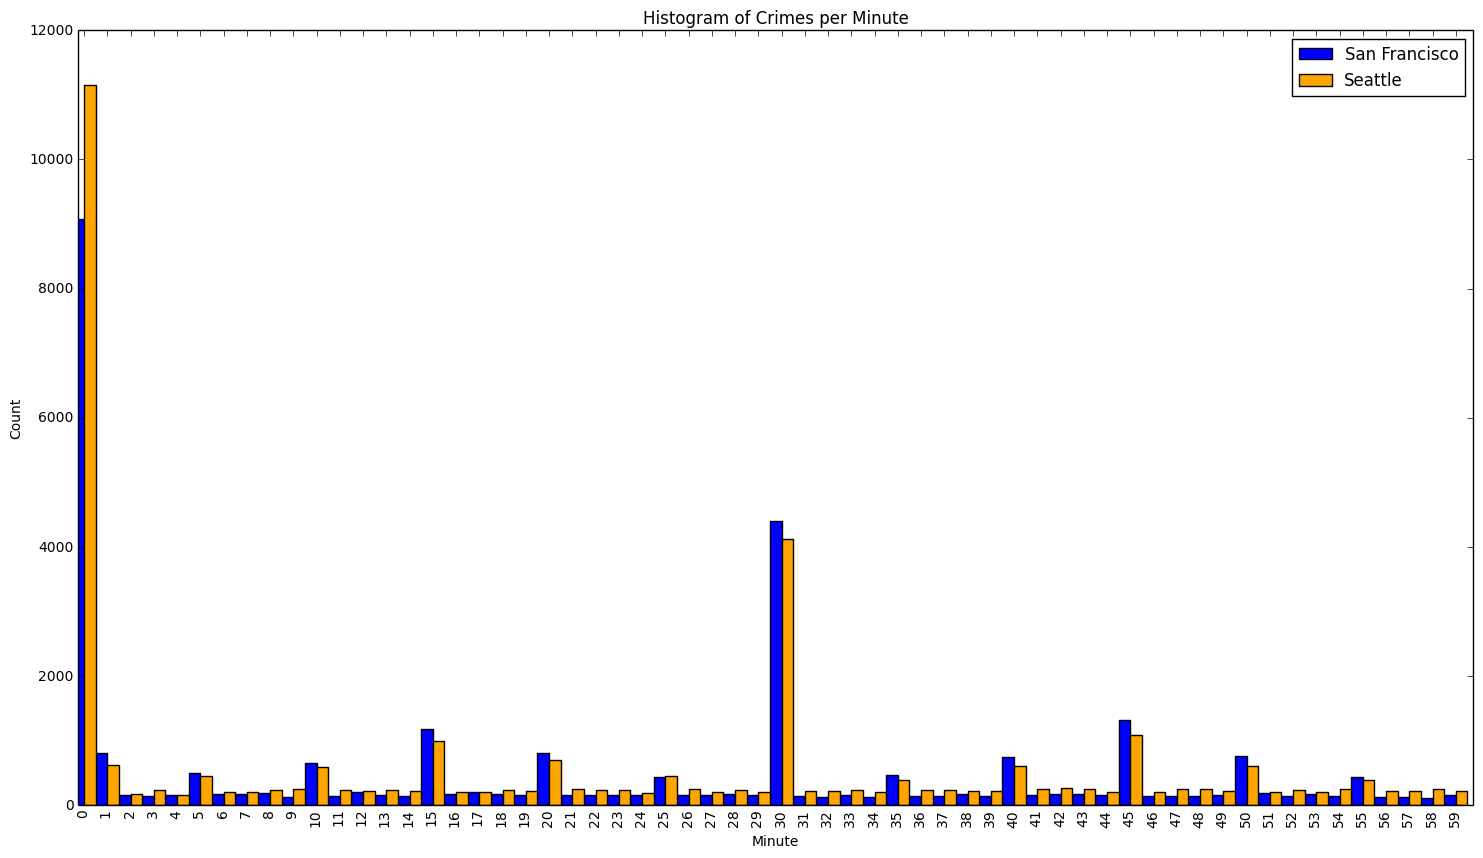

In [57]:
fig2 = plt.figure(figsize=(18,10))
ax2 = fig2.add_subplot(111)
sanfran.groupby(sanfran.Time.dt.minute).count()['Time'].plot(kind="bar", legend=None, color='blue', label='San Francisco', position=1)
seattle.groupby(seattle['Occurred Date or Date Range Start'].dt.minute).count()['Month'].plot(kind="bar", legend=None, color='orange', label='Seattle', position=0)
ax2.set_xlabel("Minute")
ax2.set_ylabel("Count")
plt.legend()
plt.title('Histogram of Crimes per Minute')
plt.show()

### After noticing the uptick in crimes being reported at noon and midnight a deeper dive was performed to see how times are reported down to the minute.  The hypothesis that the times being presented in the dataset are influenced by approximation is strongly supported by the above visualization.  In both cities it is clear that nearly all crimes are rounded to the nearest 30 minute mark, with some minor upticks at each 5 minute interval.  Due to the rounding present in this data I would recommend against any analysis that requires a time resolution less than one hour.  And even at the hourly resolution it should be noted that crime reports will be biased towards noon and midnight.